In [4]:
import pandas as pd
import giottotime

In [5]:
df = pd.read_csv("data/raw/df_accidents.csv")

In [6]:
df["date"] = pd.to_datetime(df["date"])

In [7]:
df.set_index("date", inplace=True)

In [8]:
df.head()

,number of accidents,Temperature,windspeed
date,,,
2014-01-01,608,270.448750,2.166667
2014-01-02,1702,271.283729,3.291667
2014-01-03,1371,263.582708,3.583333
2014-01-04,903,262.514166,1.708333
2014-01-05,775,268.074167,0.958333


# De-trending

In [9]:
temperature = df["Temperature"]

In [10]:
temperature

date
2014-01-01    270.448750
2014-01-02    271.283729
2014-01-03    263.582708
2014-01-04    262.514166
2014-01-05    268.074167
                 ...    
2016-12-27    283.730000
2016-12-28    277.164583
2016-12-29    274.462917
2016-12-30    275.349167
2016-12-31    274.341667
Name: Temperature, Length: 1096, dtype: float64

/Users/colinkalin/anaconda3/envs/time_test/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


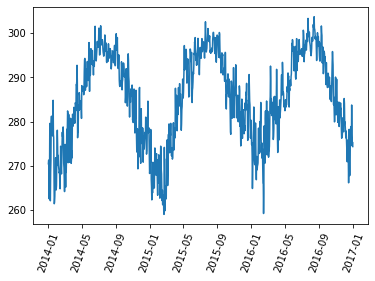

In [11]:
import matplotlib.pyplot as plt

plt.plot(temperature)
plt.xticks(rotation=70)
plt.show()

### Polynomial de-trending

In [24]:
from giottotime.models import PolynomialTrend
from giottotime.feature_creation import RemovePolynomialTrend

In [32]:
polynomial_trend = PolynomialTrend(order=3)
polynomial_trend = RemovePolynomialTrend(polynomial_order=2)

In [33]:
polynomial_trend.transform(temperature)

,RemovePolynomialTrend
date,
2014-01-01,-9.367504
2014-01-02,-8.550395
2014-01-03,-16.269264
2014-01-04,-17.355633
2014-01-05,-11.813436
...,...
2016-12-27,-2.405645
2016-12-28,-8.964754
2016-12-29,-11.660091


In [34]:
detrended_polynomial_temperature = polynomial_trend.transform(temperature)
#detrended_exponential_temperature = exponential_trend.transform(temperature)

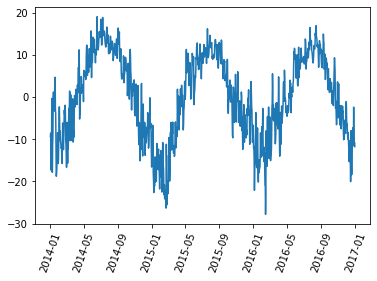

In [35]:
plt.plot(detrended_polynomial_temperature)
plt.xticks(rotation=70)
plt.show()

### Exponentialde-trending

In [13]:
from giottotime.models import ExponentialTrend

In [16]:
exponential_trend = ExponentialTrend()

In [17]:
exponential_trend.fit(temperature[:700])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_regression.py:254: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_regression.py:254: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_regression.py:254: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_regression.py:254: R

ExponentialTrend(<function mean_squared_error at 0x1369dae18>, BFGS)

In [18]:
detrended_exponential_temperature = exponential_trend.transform(temperature)

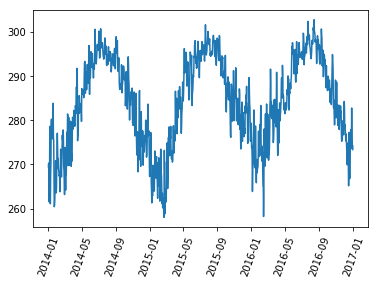

In [19]:
plt.plot(detrended_exponential_temperature)
plt.xticks(rotation=70)
plt.show()